# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv("enron_spam_dataset.csv")

In [4]:
df

,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13
...,...,...,...,...,...,...,...
31711,14628,"credit netco start up plan louise ,\nattached ...",0,ham,credit netco start up plan,"louise ,\nattached is the electronic version o...",2002-01-07
31712,16049,"everything you are looking for hello , visit o...",1,spam,everything you are looking for,"hello , visit our amazing\nonline shop !\nnows...",2005-03-26
31713,18024,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,0,ham,start date : 2 / 5 / 02 ; hourahead hour : 18 ;,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,2002-02-05
31714,1639,corhshucker daren - - - -\nthe invoices are be...,0,ham,corhshucker,daren - - - -\nthe invoices are being paid by ...,2000-09-19


# Data Understanding and Description

In [6]:
df.head()

,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


In [7]:
df.shape

(31716, 7)

In [8]:
df.columns

Index(['message_id', 'text', 'label', 'label_text', 'subject', 'message',
       'date'],
      dtype='object')

In [9]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   message_id  31716 non-null  int64 
 1   text        31665 non-null  object
 2   label       31716 non-null  int64 
 3   label_text  31716 non-null  object
 4   subject     31442 non-null  object
 5   message     31371 non-null  object
 6   date        31716 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [10]:
# Check missing values
df.isnull().sum()

message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

In [11]:
# Count spam vs ham
df["label_text"].value_counts()

label_text
spam    16163
ham     15553
Name: count, dtype: int64

In [12]:
# Percentage distribution
df["label_text"].value_counts(normalize=True) * 100

label_text
spam    50.96166
ham     49.03834
Name: proportion, dtype: float64

In [13]:
# Length of subject and message
df["subject_length"] = df["subject"].astype(str).apply(len)
df["message_length"] = df["message"].astype(str).apply(len)

# Summary statistics
df[["subject_length", "message_length"]].describe()

,subject_length,message_length
count,31716.000000,31716.000000
mean,34.629525,1471.857233
std,43.575791,4297.316994
min,1.000000,1.000000
25%,19.000000,309.000000
50%,30.000000,675.500000
75%,44.000000,1515.000000
max,3153.000000,228353.000000


In [14]:
# Sample spam email
df[df["label_text"] == "spam"].iloc[0][["subject", "message"]]

subject                    any software just for 15 $ - 99 $
message    understanding oem software\nlead me not into t...
Name: 0, dtype: object

In [15]:
# Sample ham email
df[df["label_text"] == "ham"].iloc[0][["subject", "message"]]

subject    perspective on ferc regulatory action client c...
message    19 th , 2 : 00 pm edt\nperspective on ferc reg...
Name: 1, dtype: object

In [16]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


# Data Cleaning

In [18]:
df.head()

,message_id,text,label,label_text,subject,message,date,subject_length,message_length
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18,33,122
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19,68,1043
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11,69,173
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12,42,84
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13,64,265


In [19]:
df.shape

(31716, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   message_id      31716 non-null  int64 
 1   text            31665 non-null  object
 2   label           31716 non-null  int64 
 3   label_text      31716 non-null  object
 4   subject         31442 non-null  object
 5   message         31371 non-null  object
 6   date            31716 non-null  object
 7   subject_length  31716 non-null  int64 
 8   message_length  31716 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.2+ MB


In [21]:
# Checking missing values
df.isnull().sum()

message_id          0
text               51
label               0
label_text          0
subject           274
message           345
date                0
subject_length      0
message_length      0
dtype: int64

In [22]:
# handling missing values
df["text"] = df["text"].fillna("")
df["subject"] = df["subject"].fillna("")
df["message"] = df["message"].fillna("")

In [23]:
df.isnull().sum()

message_id        0
text              0
label             0
label_text        0
subject           0
message           0
date              0
subject_length    0
message_length    0
dtype: int64

In [24]:
df["label"].unique()

array([1, 0], dtype=int64)

In [25]:
# verifying label consistency
df["label"].value_counts()

label
1    16163
0    15553
Name: count, dtype: int64

In [26]:
df["label_text"].value_counts()

label_text
spam    16163
ham     15553
Name: count, dtype: int64

In [27]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

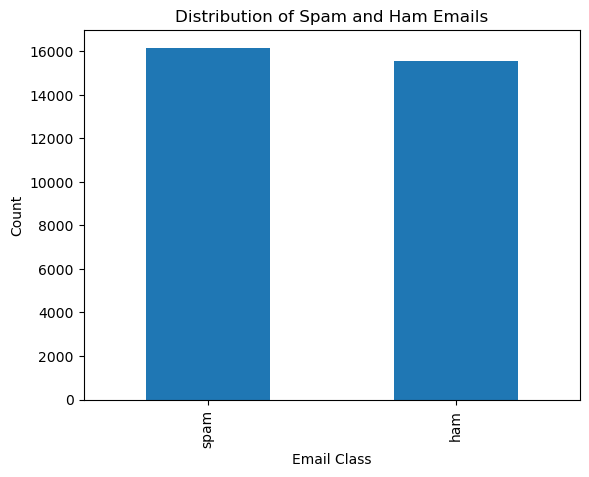

In [30]:
# Class Distribution (Bar Chart)

import matplotlib.pyplot as plt
import seaborn as sns

df["label_text"].value_counts().plot(
    kind="bar",
    title="Distribution of Spam and Ham Emails",
    xlabel="Email Class",
    ylabel="Count"
)
plt.show()

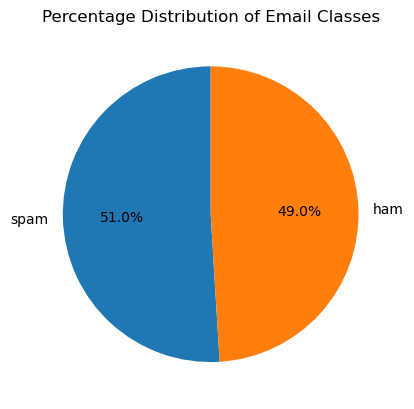

In [31]:
# Class Distribution (Pie Chart)

df["label_text"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    title="Percentage Distribution of Email Classes"
)
plt.ylabel("")
plt.show()

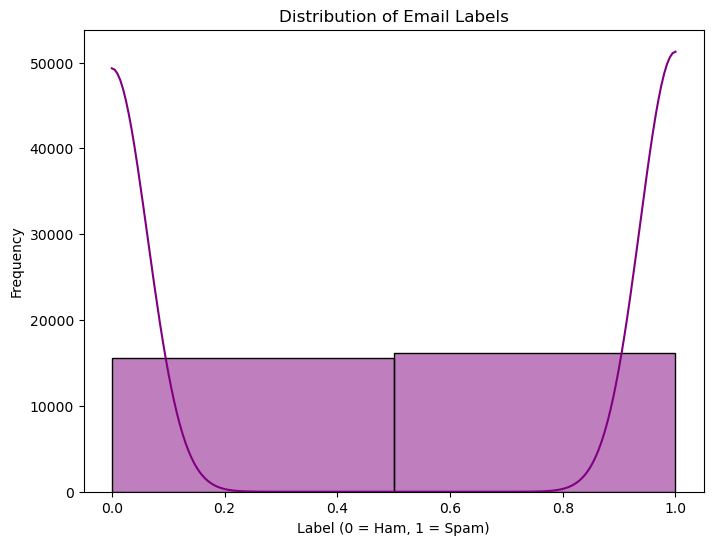

In [32]:
# Email Length Distribution (Histogram)

plt.figure(figsize=(8, 6))
sns.histplot(df["label"], bins=2, kde=True, color="purple")

plt.title("Distribution of Email Labels")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Frequency")
plt.show()

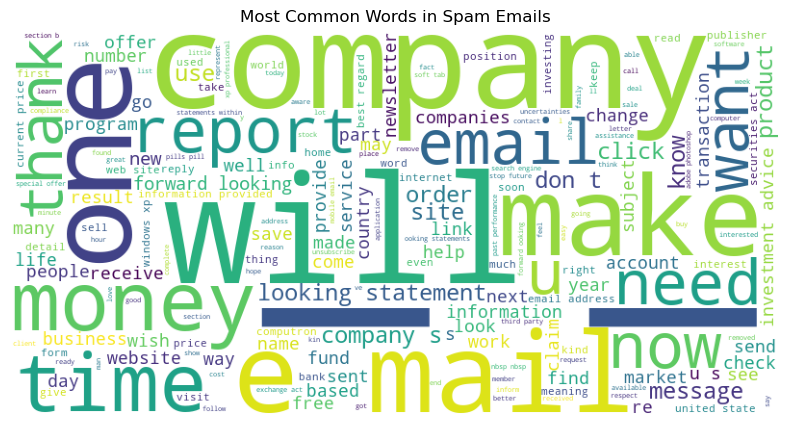

In [33]:
# Word Cloud for Spam Emails

from wordcloud import WordCloud

spam_text = " ".join(df[df["label_text"] == "spam"]["text"])

wordcloud_spam = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam.to_image())
plt.axis("off")
plt.title("Most Common Words in Spam Emails")
plt.show()

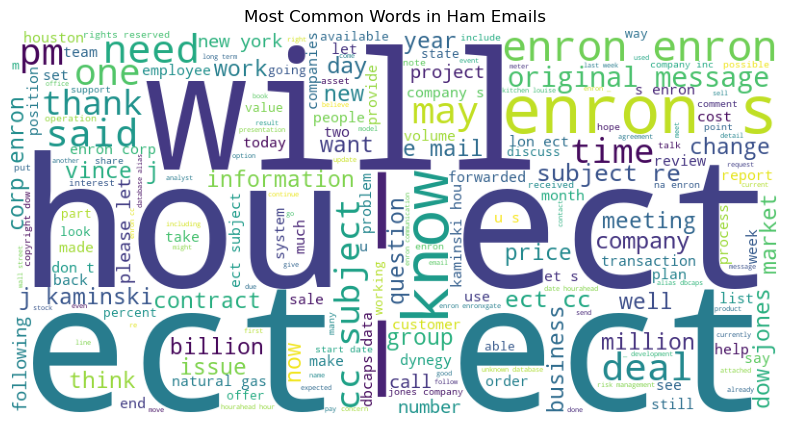

In [34]:
# Word Cloud for Ham Emails

ham_text = " ".join(df[df["label_text"] == "ham"]["text"])

wordcloud_ham = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham.to_image())
plt.axis("off")
plt.title("Most Common Words in Ham Emails")
plt.show()

# Data Pre Processing and Feature Engineering

In [36]:
# Combine Relevant Text Fields

df["combined_text"] = df["subject"] + " " + df["message"]

In [37]:
df

,message_id,text,label,label_text,subject,message,date,subject_length,message_length,combined_text
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18,33,122,any software just for 15 $ - 99 $ understandin...
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19,68,1043,perspective on ferc regulatory action client c...
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11,69,173,wanted to try ci 4 lis but thought it was way ...
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12,42,84,"enron / hpl actuals for december 11 , 2000 tec..."
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13,64,265,looking for cheap high - quality software ? ro...
...,...,...,...,...,...,...,...,...,...,...
31711,14628,"credit netco start up plan louise ,\nattached ...",0,ham,credit netco start up plan,"louise ,\nattached is the electronic version o...",2002-01-07,26,112,"credit netco start up plan louise ,\nattached ..."
31712,16049,"everything you are looking for hello , visit o...",1,spam,everything you are looking for,"hello , visit our amazing\nonline shop !\nnows...",2005-03-26,30,1510,"everything you are looking for hello , visit o..."
31713,18024,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,0,ham,start date : 2 / 5 / 02 ; hourahead hour : 18 ;,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,2002-02-05,47,632,start date : 2 / 5 / 02 ; hourahead hour : 18 ...
31714,1639,corhshucker daren - - - -\nthe invoices are be...,0,ham,corhshucker,daren - - - -\nthe invoices are being paid by ...,2000-09-19,11,362,corhshucker daren - - - -\nthe invoices are be...


In [38]:
# Import Required Libraries for Text Processing

import re
import string

In [39]:
# Define Text Cleaning Function (Preprocessing)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"\S+@\S+", "", text)          # remove email addresses
    text = re.sub(r"\d+", "", text)              # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # punctuation
    text = re.sub(r"\s+", " ", text).strip()     # extra spaces
    return text

In [40]:
# Applying Text Cleaning
df["combined_text"] = df["combined_text"].apply(clean_text)

In [41]:
# Define Features (X) and Target (y)

X = df["combined_text"]
y = df["label"]   # 0 = ham, 1 = spam

In [42]:
# Train–Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
# TF-IDF Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf.transform(X_test)

# Check shapes
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape:", X_test_tfidf.shape)

TF-IDF Train Shape: (25372, 5000)
TF-IDF Test Shape: (6344, 5000)


In [44]:
tfidf.get_feature_names_out()[:20]

array(['aa', 'ab', 'abb', 'abiiity', 'ability', 'able', 'abroad',
       'absence', 'absolute', 'absolutely', 'abuse', 'ac', 'academic',
       'acadia', 'accept', 'acceptable', 'acceptance', 'accepted',
       'accepting', 'access'], dtype=object)

# Data Engineering

In [46]:
# Creating Engineered Features

df["email_length"] = df["combined_text"].apply(len)
df["word_count"] = df["combined_text"].apply(lambda x: len(x.split()))

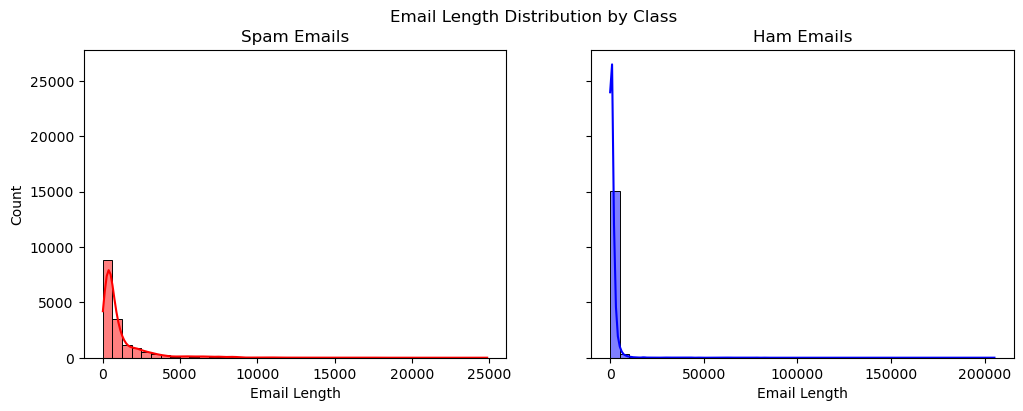

In [47]:
# Histogram Email Length Distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.histplot(
    df[df["label_text"] == "spam"]["email_length"],
    bins=40,
    kde=True,
    color="red",
    ax=axes[0]
)
axes[0].set_title("Spam Emails")
axes[0].set_xlabel("Email Length")

sns.histplot(
    df[df["label_text"] == "ham"]["email_length"],
    bins=40,
    kde=True,
    color="blue",
    ax=axes[1]
)
axes[1].set_title("Ham Emails")
axes[1].set_xlabel("Email Length")

plt.suptitle("Email Length Distribution by Class")
plt.show()

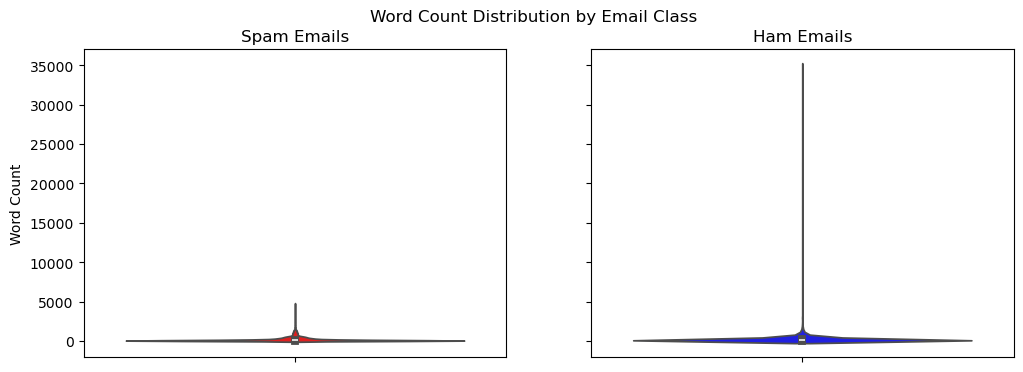

In [48]:
# Violin Plot Word Count vs Class

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.violinplot(
    y=df[df["label_text"] == "spam"]["word_count"],
    color="red",
    ax=axes[0]
)
axes[0].set_title("Spam Emails")
axes[0].set_ylabel("Word Count")

sns.violinplot(
    y=df[df["label_text"] == "ham"]["word_count"],
    color="blue",
    ax=axes[1]
)
axes[1].set_title("Ham Emails")

plt.suptitle("Word Count Distribution by Email Class")
plt.show()

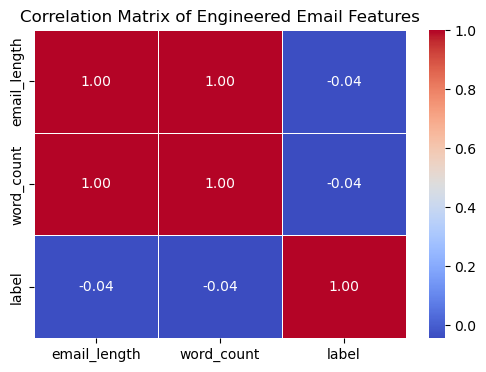

In [49]:
# Correlation Matrix

corr_data = df[["email_length", "word_count", "label"]]

plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_data.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Engineered Email Features")
plt.show()

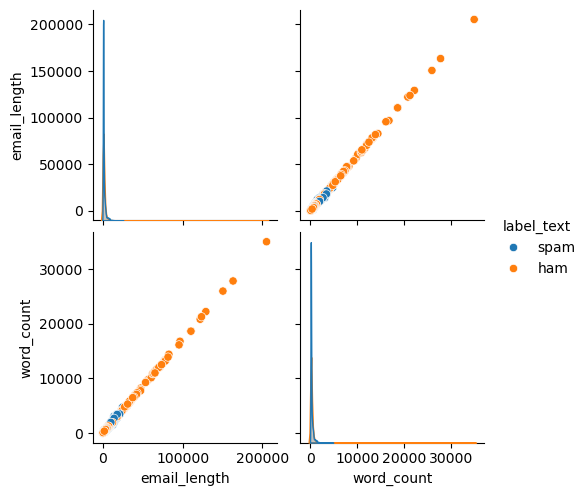

In [50]:
# Pairplot

sns.pairplot(
    df[["email_length", "word_count", "label_text"]],
    hue="label_text"
)
plt.show()

# Model Training & Evaluation: Logistic Regression

In [52]:
# Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
# Predictions
y_pred = lr_model.predict(X_test_tfidf)
y_prob = lr_model.predict_proba(X_test_tfidf)[:, 1]

In [54]:
# Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9866015132408575


In [55]:
# Classification Report
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99      3111
        Spam       0.98      0.99      0.99      3233

    accuracy                           0.99      6344
   macro avg       0.99      0.99      0.99      6344
weighted avg       0.99      0.99      0.99      6344



In [56]:
# F1 Score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9869291096417039


In [57]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9983849949039871


In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[3050   61]
 [  24 3209]]


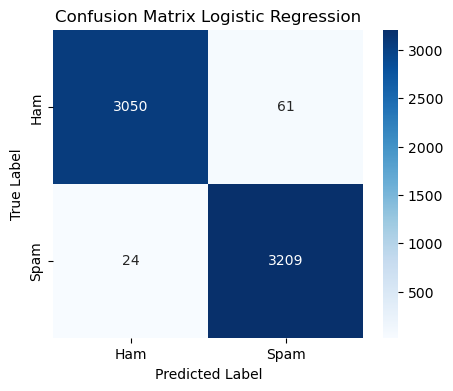

In [59]:
# Heat Map for Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Logistic Regression")
plt.show()

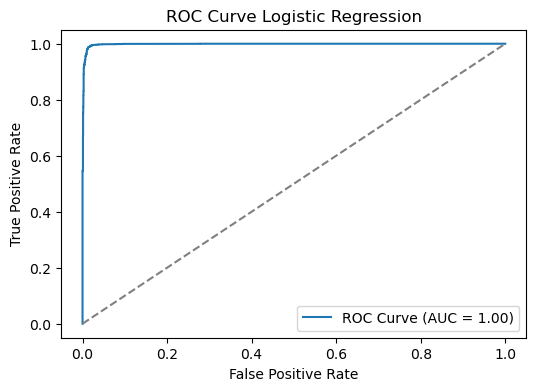

In [60]:
# ROC Curve Plot

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression")
plt.legend()
plt.show()

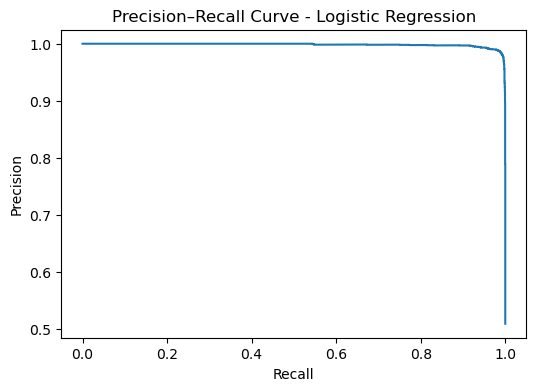

In [61]:
# Precision–Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Logistic Regression")
plt.show()

# Model Training & Evaluation: Naïve Bayes (MultinomialNB)

In [63]:
# Train Naïve Bayes Model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [64]:
# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)
y_prob_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

In [65]:
# Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes Accuracy:", accuracy_nb)

Naïve Bayes Accuracy: 0.9799810844892812


In [66]:
# Classification Report
from sklearn.metrics import classification_report

print("Classification Report (Naïve Bayes):\n")
print(classification_report(y_test, y_pred_nb, target_names=["Ham", "Spam"]))

Classification Report (Naïve Bayes):

              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98      3111
        Spam       0.98      0.98      0.98      3233

    accuracy                           0.98      6344
   macro avg       0.98      0.98      0.98      6344
weighted avg       0.98      0.98      0.98      6344



In [67]:
# F1 Score
from sklearn.metrics import f1_score

f1_nb = f1_score(y_test, y_pred_nb)
print("Naïve Bayes F1 Score:", f1_nb)

Naïve Bayes F1 Score: 0.9804404743569999


In [68]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score

roc_auc_nb = roc_auc_score(y_test, y_prob_nb)
print("Naïve Bayes ROC AUC Score:", roc_auc_nb)

Naïve Bayes ROC AUC Score: 0.9974946467256514


In [69]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naïve Bayes):\n", conf_matrix_nb)

Confusion Matrix (Naïve Bayes):
 [[3034   77]
 [  50 3183]]


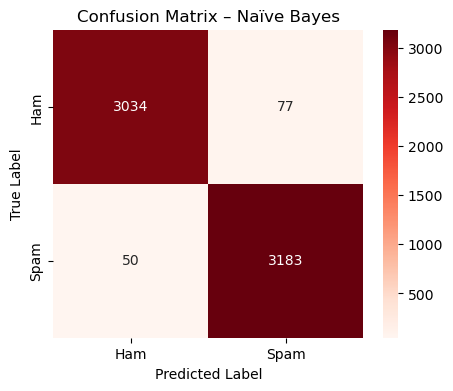

In [70]:
# Heat Map for Confusion Matrix
# Generate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Naïve Bayes")
plt.show()

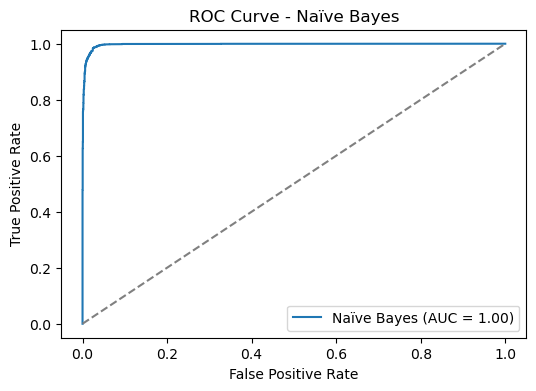

In [71]:
# ROC Curve Plot
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label=f"Naïve Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

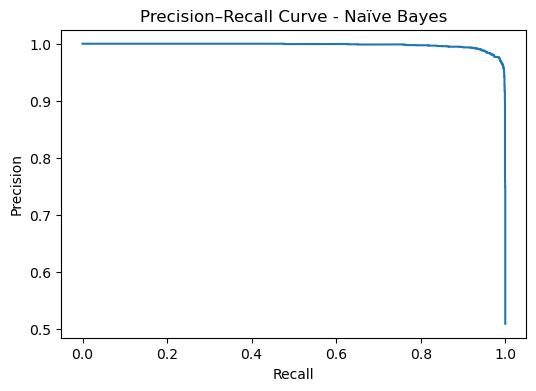

In [72]:
# Precision–Recall Curve
from sklearn.metrics import precision_recall_curve

precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)

plt.figure(figsize=(6, 4))
plt.plot(recall_nb, precision_nb)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Naïve Bayes")
plt.show()

# Model Training & Evaluation: SVM

In [147]:
# Train SVM Model
from sklearn.svm import SVC

svm_model = SVC(
    kernel="linear",        
    probability=True,
    random_state=42
)

svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [148]:
# Predictions

y_pred_svm = svm_model.predict(X_test_tfidf)
y_prob_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]

In [149]:
# Accuracy

from sklearn.metrics import accuracy_score

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9883354350567465


In [150]:
# Classification Report

from sklearn.metrics import classification_report

print("Classification Report (SVM):\n")
print(classification_report(y_test, y_pred_svm, target_names=["Ham", "Spam"]))

Classification Report (SVM):

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99      3111
        Spam       0.98      0.99      0.99      3233

    accuracy                           0.99      6344
   macro avg       0.99      0.99      0.99      6344
weighted avg       0.99      0.99      0.99      6344



In [151]:
# F1 Score

from sklearn.metrics import f1_score

f1_svm = f1_score(y_test, y_pred_svm)
print("SVM F1 Score:", f1_svm)

SVM F1 Score: 0.9886083743842364


In [152]:
# ROC AUC Score

from sklearn.metrics import roc_auc_score

roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print("SVM ROC AUC Score:", roc_auc_svm)

SVM ROC AUC Score: 0.9984470856284282


In [153]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)

Confusion Matrix (SVM):
 [[3059   52]
 [  22 3211]]


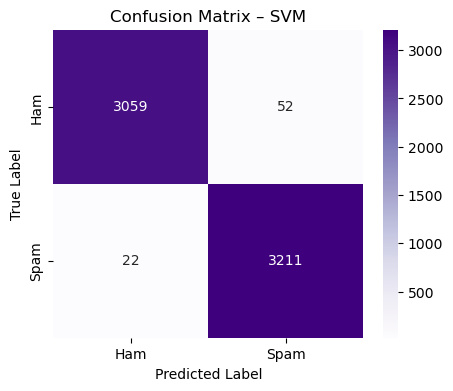

In [154]:
# Confusion Matrix Plot

plt.figure(figsize=(5, 4))
sns.heatmap(
    conf_matrix_svm,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – SVM")
plt.show()


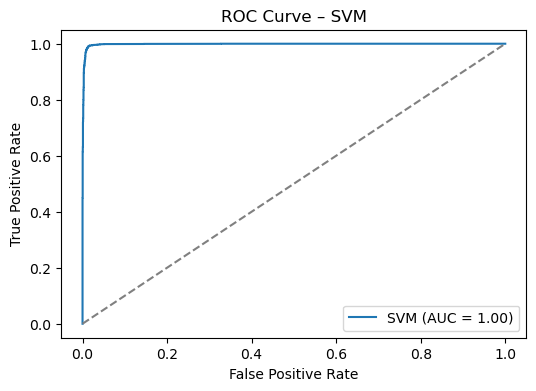

In [155]:
# ROC Curve

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM")
plt.legend()
plt.show()

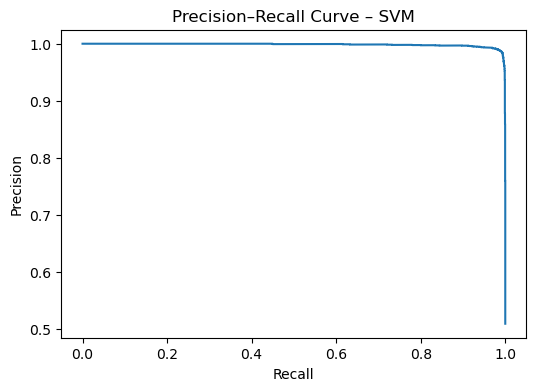

In [156]:
# Precision–Recall Curve

from sklearn.metrics import precision_recall_curve

precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)

plt.figure(figsize=(6, 4))
plt.plot(recall_svm, precision_svm)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – SVM")
plt.show()